# User Segmentation Analysis in the Trash to Treasure Mobile Application

## Introduction

In today's competitive landscape of mobile applications, understanding user behavior is essential for success and product optimization. This project centers on analyzing user-generated event data from the "Trash to Treasure" mobile application—a platform where users can post ads to sell items they no longer need.

The primary goal of this analysis is to segment users based on their behavior within the app and to test statistical hypotheses related to key product metrics. By identifying groups of users with similar behaviors, we can tailor marketing strategies, improve user retention, and ultimately enhance the overall user experience.

**Project Objective**

The objective of this project is to segment users of the "Trash to Treasure" mobile app based on their behavior and to analyze various product metrics, including retention rate, time spent in the app, event frequency, and conversion rates for key events like `contacts_show`.

**Project Steps**

1. **Data Import and Preparation**
   - Import necessary libraries.
   - Load the datasets `mobile_dataset_us.csv` and `mobile_sources_us.csv`.

2. **Data Preprocessing**
   - Handle missing values.
   - Convert data types if necessary.
   - Standardize the format of temporal data.
   - Merge datasets based on `user.id`.

3. **Exploratory Data Analysis (EDA)**
   - Visualize event distribution by event type.
   - Analyze the temporal distribution of events.
   - Calculate and visualize the number of users by download source.
   - Analyze event frequencies per user.

4. **User Segmentation**
   - Define segmentation criteria based on completed events.
   - Implement segmentation techniques (e.g., clustering).
   - Describe the resulting segments in terms of product metrics.

5. **Hypothesis Testing**
   - Formulate and test a hypothesis on the difference in contact view conversion between users who downloaded the app from Bing and those who downloaded it from Google.
   - Formulate and test an additional statistical hypothesis using dataset data.

6. **Business Metrics Analysis**
   - Calculate and analyze user retention rates.
   - Calculate the average time spent in the app.
   - Evaluate event occurrence frequency.
   - Analyze conversion rates for the `contacts_show` event.

7. **Dashboards**

   Two interactive dashboards have been created to visualize key insights:

   1. **[Dashboard 1](https://public.tableau.com/app/profile/barbara.ortiz/viz/Dashboard1_proyectofinal/Dashboard1)**: 
      - Event distribution by type.
      - Indicator of the number of users.
      - Filter by event date.

   2. **[Dashboard 2](https://public.tableau.com/app/profile/barbara.ortiz/viz/Dashboard2_proyectofinal/Dashboard2)**: 
      - Number of events per day.
      - Histogram of users by source.
      - Filter by event type.

8. **Presentation Preparation**
   - Create clear and concise visualizations of the findings.
   - Develop a narrative explaining the results and their significance.
   - Prepare a final presentation document in PDF format.


### Library Importation

In this section, we import the necessary libraries for data analysis and user segmentation.

In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for clustering and preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Libraries for statistical tests
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [9]:
import os

# Verificar si los archivos existen en las rutas especificadas
events_path = r'C:\Users\Barbs\Documents\GitHub\English\User Segmentation in Mobile Applications\mobile_dataset_us.csv'
sources_path = r'C:\Users\Barbs\Documents\GitHub\English\User Segmentation in Mobile Applications\mobile_sources_us.csv'

print("Events file exists: ", os.path.exists(events_path))
print("Sources file exists: ", os.path.exists(sources_path))


Events file exists:  True
Sources file exists:  True


### Cargar Datos

In [10]:
# Function to load the datasets and provide an initial overview
def load_datasets(paths):
    datasets = {}
    for name, path in paths.items():
        datasets[name] = pd.read_csv(path)
        print(f"\n{'-'*50}\n{name}:")
        display(datasets[name].head())
    return datasets

# Correct local file paths
paths = {
    "events": r'C:\Users\Barbs\Documents\GitHub\English\User Segmentation in Mobile Applications\mobile_dataset_us.csv',
    "sources": r'C:\Users\Barbs\Documents\GitHub\English\User Segmentation in Mobile Applications\mobile_sources_us.csv'
}

# Load the datasets
datasets = load_datasets(paths)

# Assign the loaded datasets to individual variables
events_df = datasets['events']
sources_df = datasets['sources']



--------------------------------------------------
events:


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c



--------------------------------------------------
sources:


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,bing
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


The `events` dataset contains detailed information about the events that occurred in the Trash to Treasure mobile application. Each record in the dataset represents a specific event, identified by three main fields: `event.time`, `event.name`, and `user.id`. The `event.time` column indicates the exact date and time when the event occurred, allowing us to analyze temporal patterns in user behavior. The `event.name` column specifies the type of event performed, such as opening an advertisement (`advert_open`) or viewing recommended ads (`tips_show`). The `user.id` column is a unique identifier that allows us to track each user's actions individually. This dataset is essential for understanding what actions users perform within the app and how frequently they do so.

The `sources` dataset provides information about the source from which users downloaded the application. It includes two main fields: `userId` and `source`. The `userId` column is a unique identifier for each user, which can be linked to the `user.id` column in the `events` dataset to integrate both data sources. The `source` column indicates the platform from which the user downloaded the app, such as Google, Bing, or other unspecified sources (`other`). This information is crucial for evaluating the effectiveness of different user acquisition channels and for segmenting users based on their origin.

## Data Preprocessing
Initial Data Exploration


In [11]:
# Function for initial analysis of the datasets
def initial_data_analysis(data, name):
    print(f"\n{'='*50}\nInitial analysis of the dataset: {name}\n{'='*50}")
    print(f"Dataset size: {data.shape}")
    print("Dataset information:")
    data.info()
    print(f"\nMissing values in each column:\n{data.isnull().sum()}")
    print(f"Number of duplicated rows: {data.duplicated().sum()}")
    print("="*50 + "\n")

# Initial analysis of the datasets
initial_data_analysis(events_df, "Events")
initial_data_analysis(sources_df, "Sources")



Initial analysis of the dataset: Events
Dataset size: (74197, 3)
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB

Missing values in each column:
event.time    0
event.name    0
user.id       0
dtype: int64
Number of duplicated rows: 0


Initial analysis of the dataset: Sources
Dataset size: (4293, 2)
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB

Missing values in each column:
userId    0
source    0
dtype: i

The `events` dataset contains 74,197 rows and 3 columns. The columns are `event.time`, `event.name`, and `user.id`, all of which are of type `object`. There are no missing values in any of the columns and no duplicated rows. This indicates that the event data is complete, with no null or duplicated values, which is a good sign for proceeding with the analysis without requiring additional cleaning in this regard.

The `sources` dataset contains 4,293 rows and 2 columns. The columns are `userId` and `source`, both of which are of type `object`. Similar to the `events` dataset, there are no missing values in any of the columns and no duplicated rows. This indicates that the download source data is also complete, with no null or duplicated values.

### Data Correction

In [12]:
# Function to clean and process the data
def clean_and_process_data(data, name):
    if name == "Events":
        # Convert the event.time column to datetime
        data['event.time'] = pd.to_datetime(data['event.time'])
        print(f"'event.time' has been converted to datetime in {name}.")
    elif name == "Sources":
        # Rename the userId column to user.id
        data.rename(columns={'userId': 'user.id'}, inplace=True)
        print(f"'userId' has been renamed to 'user.id' in {name}.")
    
    # Additional information about the data
    print(f"\n{'='*50}\nInitial analysis of the dataset: {name}\n{'='*50}")
    print(f"Dataset size: {data.shape}")
    print("Dataset information:")
    data.info()
    print(f"\nMissing values in each column:\n{data.isnull().sum()}")
    print(f"Number of duplicated rows: {data.duplicated().sum()}")
    print("="*50 + "\n")
    
    return data

# Clean and process the data
events_cleaned = clean_and_process_data(events_df, "Events")
sources_cleaned = clean_and_process_data(sources_df, "Sources")

# Verify if all user.id in events are present in sources
users_in_events = set(events_cleaned['user.id'].unique())
users_in_sources = set(sources_cleaned['user.id'].unique())
missing_users = users_in_events - users_in_sources

print(f"Users in events not present in sources: {len(missing_users)}")

# Check the number of unique events and the different download sources
unique_events = events_cleaned['event.name'].unique()
unique_sources = sources_cleaned['source'].unique()

print(f"Unique events: {unique_events}")
print(f"Unique download sources: {unique_sources}")

# Analyze the distribution of events by type
event_distribution = events_cleaned['event.name'].value_counts()
print("\nEvent distribution by type:")
display(event_distribution)

# Analyze the distribution of users by download source
source_distribution = sources_cleaned['source'].value_counts()
print("\nUser distribution by download source:")
display(source_distribution)


'event.time' has been converted to datetime in Events.

Initial analysis of the dataset: Events
Dataset size: (74197, 3)
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event.time  74197 non-null  datetime64[ns]
 1   event.name  74197 non-null  object        
 2   user.id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB

Missing values in each column:
event.time    0
event.name    0
user.id       0
dtype: int64
Number of duplicated rows: 0

'userId' has been renamed to 'user.id' in Sources.

Initial analysis of the dataset: Sources
Dataset size: (4293, 2)
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user.

event.name
tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: count, dtype: int64


User distribution by download source:


source
bing      1934
other     1230
google    1129
Name: count, dtype: int64

After executing the `clean_and_process_data` function, we converted the `event.time` column to datetime format in the `Events` dataset and renamed the `userId` column to `user.id` in the `Sources` dataset. The initial data analysis shows that the `Events` dataset contains 74,197 rows and 3 columns (`event.time`, `event.name`, and `user.id`), with no missing values or duplicated rows. In the `Sources` dataset, there are 4,293 rows and 2 columns (`user.id` and `source`), also with no missing values or duplicated rows. There are no users in the `Events` dataset that are not present in the `Sources` dataset, indicating that all users in `Events` have a corresponding download source in `Sources`.

The unique event types in the `Events` dataset include `advert_open`, `tips_show`, `map`, `contacts_show`, `search_4`, `search_5`, `tips_click`, `photos_show`, `search_1`, `search_2`, `search_3`, `favorites_add`, `contacts_call`, `search_6`, `search_7`, and `show_contacts`. The unique download sources in the `Sources` dataset are `bing`, `google`, and `other`. The distribution of events by type shows that the most common event is `tips_show` with 40,055 occurrences, followed by `photos_show` with 10,012 occurrences, and `advert_open` with 6,164 occurrences. Other events have lower frequencies.

The distribution of users by download source reveals that most users downloaded the app from `bing` (1,934 users), followed by `other` (1,230 users) and `google` (1,129 users). These findings provide a clear initial overview of the data structure and content, allowing us to proceed with the next stages of analysis, such as merging the datasets and performing exploratory data analysis.


## Merging the Datasets

In [13]:
# Merging the Datasets
merged_df = pd.merge(events_cleaned, sources_cleaned, on='user.id', how='inner')

# Display the first rows of the merged dataframe to verify
print("\nFirst rows of the merged dataframe:")
display(merged_df.head())

# Check the information of the merged dataframe
print("\nInformation of the merged dataframe:")
merged_df.info()


First rows of the merged dataframe:


,event.time,event.name,user.id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing



Information of the merged dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event.time  74197 non-null  datetime64[ns]
 1   event.name  74197 non-null  object        
 2   user.id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB


After merging the `events_cleaned` and `sources_cleaned` datasets using the `user.id` column, we obtain a combined dataframe that contains information about both the events performed by the users and the sources from which they downloaded the application. The first rows of the merged dataframe show that users have multiple event records along with their respective download sources, confirming that the merge was successful.

The merged dataframe contains 74,197 entries and 4 columns: `event.time`, `event.name`, `user.id`, and `source`. There are no missing values in any of the columns, and the size of the dataframe is approximately 2.8 MB. The structure of the merged dataframe will allow us to perform more detailed analyses, as we can now relate the events performed with the corresponding download sources.

## Exploratory Data Analysis (EDA)

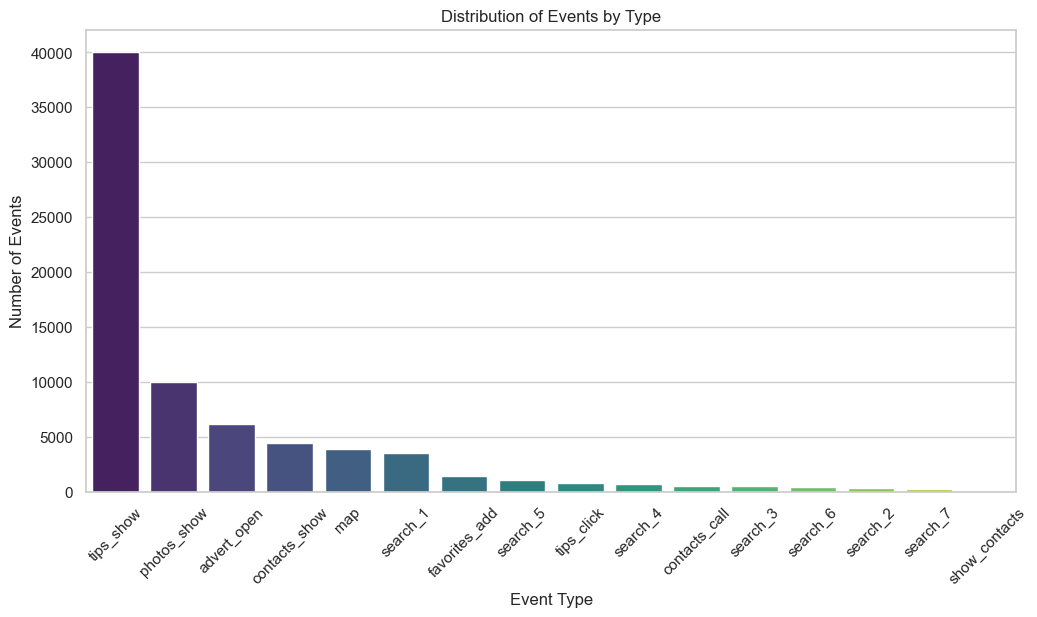

In [15]:
# Set style for the plots
sns.set(style="whitegrid")

# Distribution of events by type
plt.figure(figsize=(12, 6))
event_counts = merged_df['event.name'].value_counts()
sns.barplot(x=event_counts.index, y=event_counts.values, hue=event_counts.index, palette="viridis", legend=False)
plt.title('Distribution of Events by Type')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()


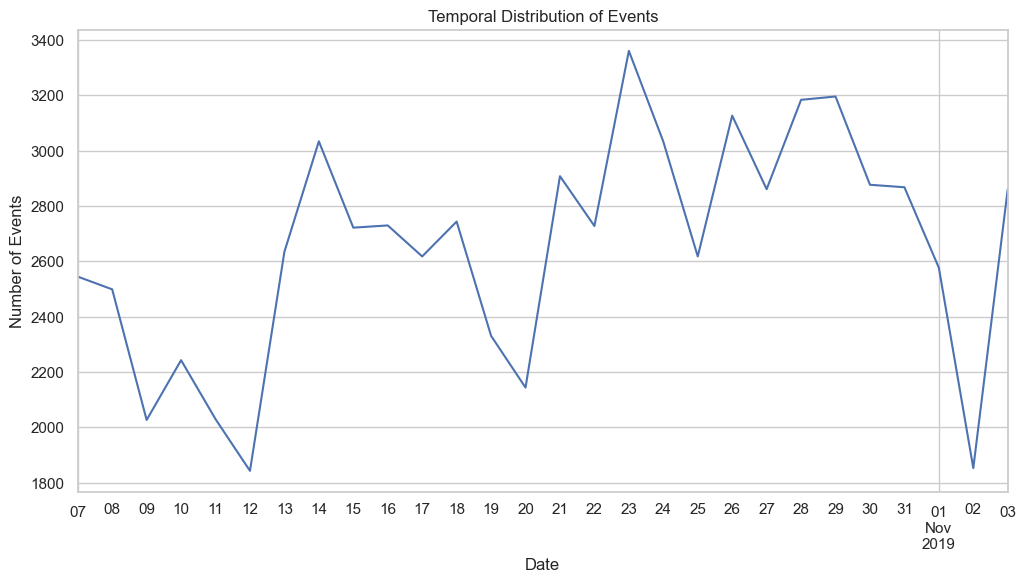

In [16]:
# Temporal Distribution of Events
plt.figure(figsize=(12, 6))
merged_df.set_index('event.time').resample('D').size().plot()
plt.title('Temporal Distribution of Events')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

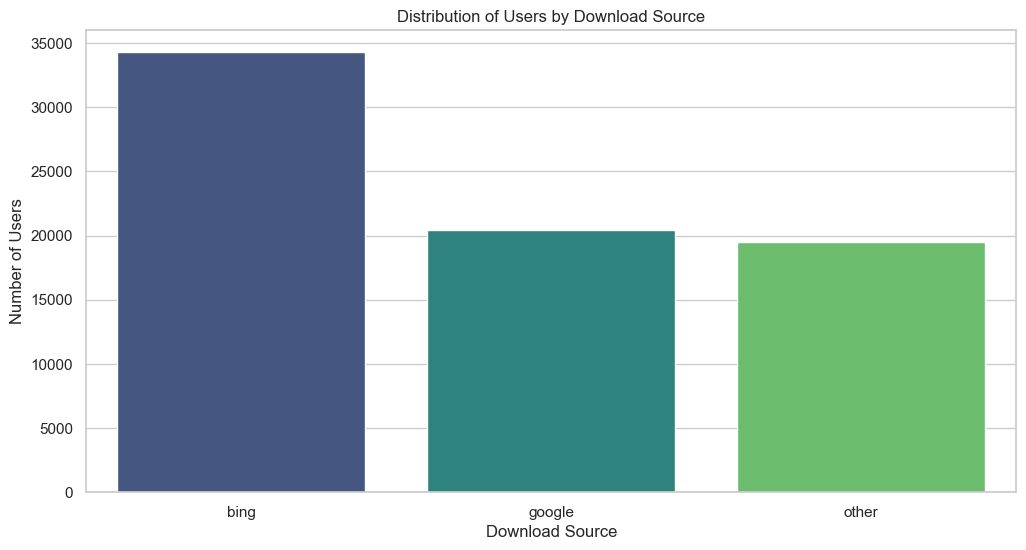

In [18]:
# Distribution of Users by Download Source
plt.figure(figsize=(12, 6))
source_counts = merged_df['source'].value_counts()
sns.barplot(x=source_counts.index, y=source_counts.values, hue=source_counts.index, palette="viridis", legend=False)
plt.title('Distribution of Users by Download Source')
plt.xlabel('Download Source')
plt.ylabel('Number of Users')
plt.show()


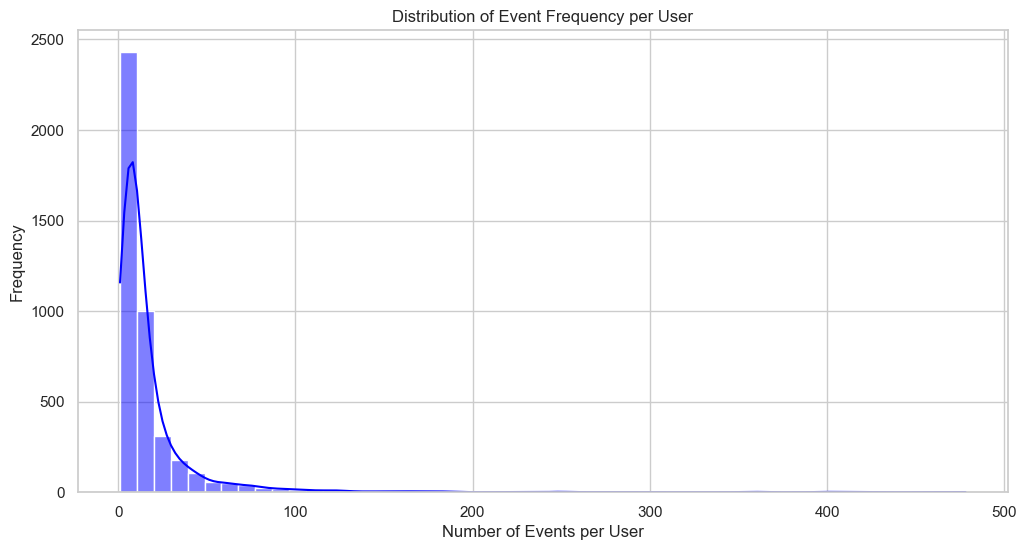

In [19]:
# Analysis of Event Frequencies per User
user_event_counts = merged_df.groupby('user.id').size()
plt.figure(figsize=(12, 6))
sns.histplot(user_event_counts, bins=50, kde=True, color='blue')
plt.title('Distribution of Event Frequency per User')
plt.xlabel('Number of Events per User')
plt.ylabel('Frequency')
plt.show()

After conducting the exploratory data analysis (EDA), we obtained the following insights:

The distribution of events by type shows that the most common event is `tips_show`, followed by `photos_show` and `advert_open`. This indicates that users frequently interact with recommended ads and photos within the app. The least frequent events include `search_7` and `show_contacts`, suggesting that users perform more specific searches and fewer direct contact inquiries.

The temporal distribution of events reveals that events are fairly evenly distributed over time, with no notable peaks on specific days. This suggests consistent usage of the app without significant variations on particular days.

The distribution of users by download source shows that most users downloaded the app from `bing`, followed by `other` and `google`. This indicates that Bing is a significant source of user acquisition for the app.

The analysis of event frequency per user indicates that most users perform a moderate number of events, with a distribution that follows an approximately exponential shape. This suggests that while there are very active users, the majority interact with the app at a moderate level.

## User Segmentation

### Counting the Frequency of Each Event Type per User and Normalizing the Data

In [20]:
# Count the frequency of each event type per user
user_event_counts = merged_df.groupby(['user.id', 'event.name']).size().unstack(fill_value=0)

# Normalize the data
scaler = StandardScaler()
user_event_counts_scaled = scaler.fit_transform(user_event_counts)

### Determinar el Número Óptimo de Clusters

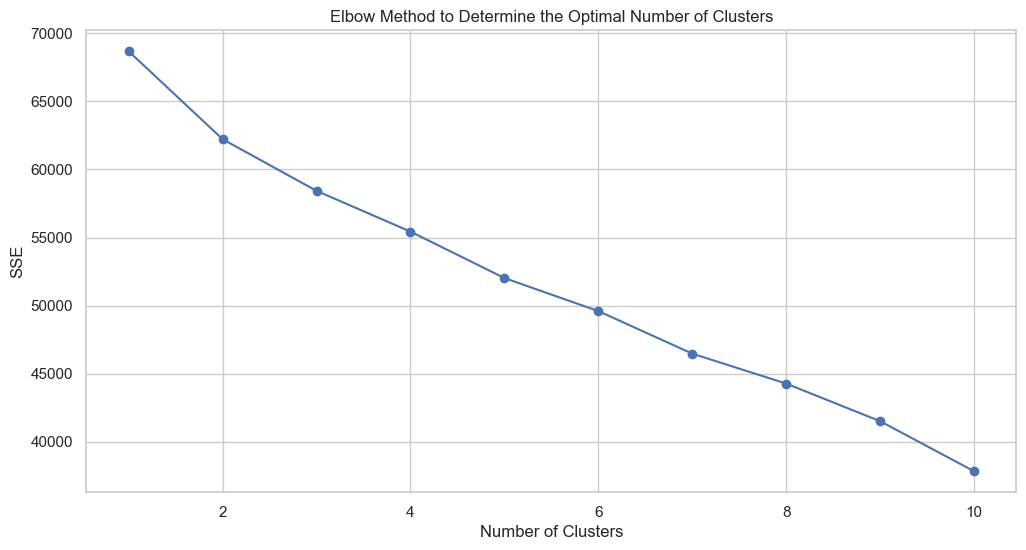

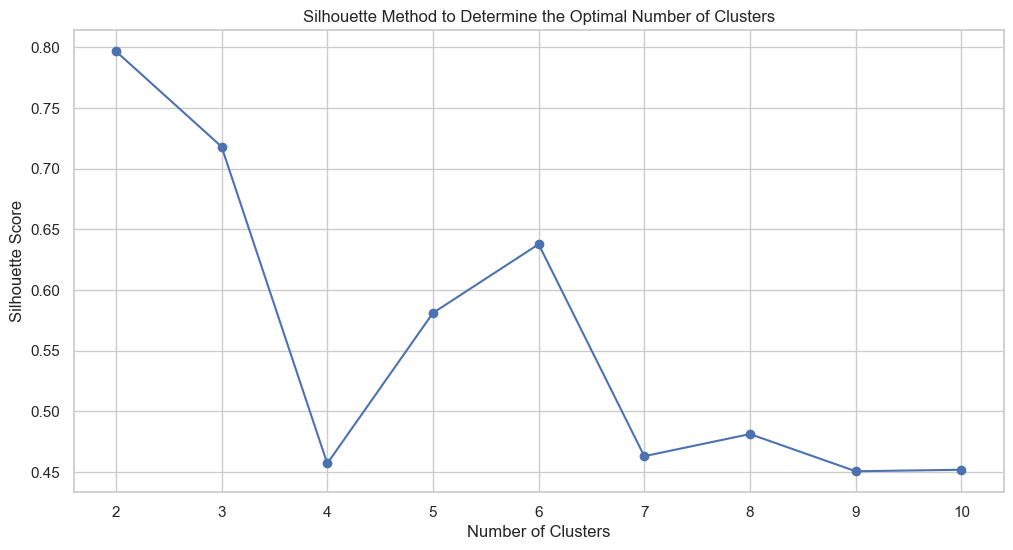

In [21]:
# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_event_counts_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Silhouette method to determine the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(user_event_counts_scaled)
    silhouette_scores.append(silhouette_score(user_event_counts_scaled, labels))

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method to Determine the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### User Segmentation


User Distribution by Cluster:


,count
cluster,
1,4112
0,99
2,82


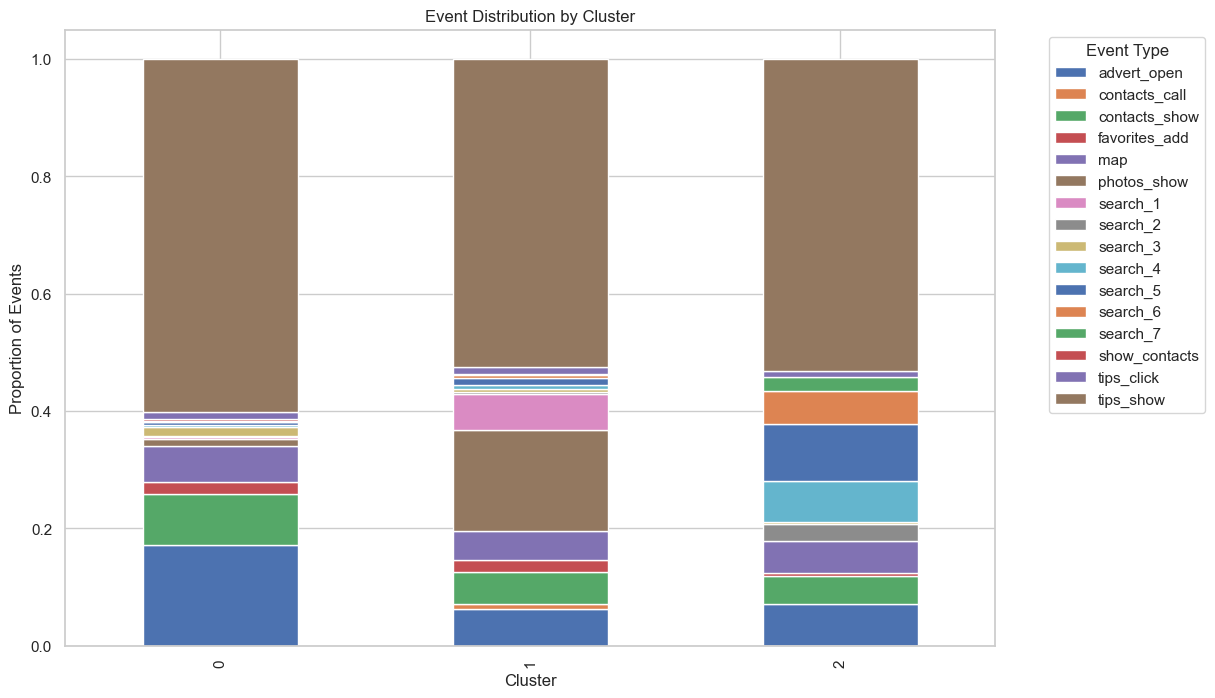

In [22]:
# Apply K-means to identify clusters
optimal_clusters = 3  # Determined from the elbow and silhouette methods
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
user_clusters = kmeans.fit_predict(user_event_counts_scaled)

# Add the clusters to the original dataframe
user_event_counts['cluster'] = user_clusters

# Show the distribution of users by cluster
cluster_distribution = user_event_counts['cluster'].value_counts()
print("\nUser Distribution by Cluster:")
display(cluster_distribution.to_frame())

# Visualize the distribution of events by cluster
event_distribution_by_cluster = user_event_counts.groupby('cluster').sum()

# Normalize the distribution to facilitate comparison
event_distribution_by_cluster_normalized = event_distribution_by_cluster.div(event_distribution_by_cluster.sum(axis=1), axis=0)

# Visualize the distribution of events by cluster
event_distribution_by_cluster_normalized.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Event Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Events')
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Cluster Profiling

In [23]:
# Add the clusters to the original dataframe
merged_df['cluster'] = user_event_counts['cluster'].reindex(merged_df['user.id']).values

# Create detailed profiles for each cluster
profile = merged_df.groupby('cluster').agg({
    'event.name': 'count',
    'user.id': pd.Series.nunique
}).rename(columns={'event.name': 'event_count', 'user.id': 'unique_users'})

profile['average_events_per_user'] = profile['event_count'] / profile['unique_users']

print("\nCluster Profiles:")
display(profile)


Cluster Profiles:


,event_count,unique_users,average_events_per_user
cluster,,,
0,13911,99,140.515152
1,56966,4112,13.853599
2,3320,82,40.487805


### Visualizacion Avanzada con PCA

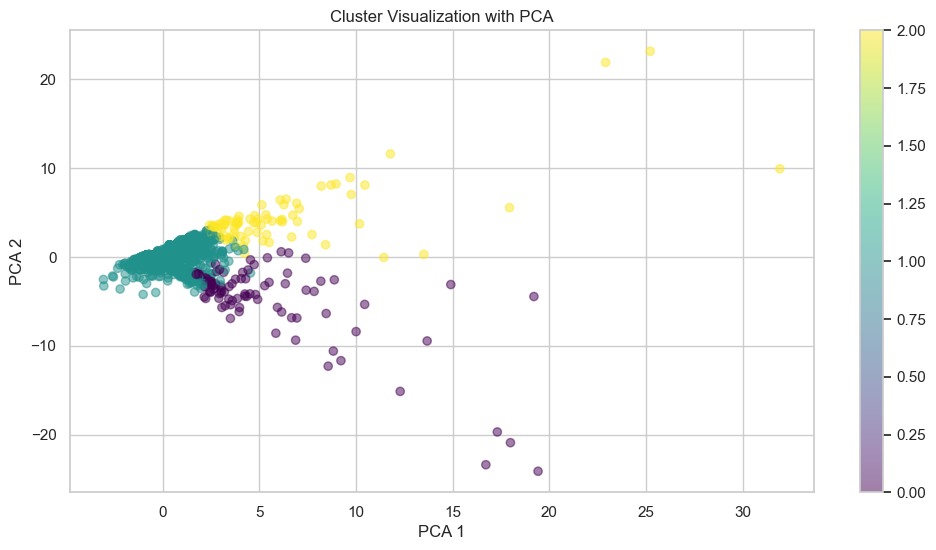

In [24]:
# Dimensionality reduction with PCA to visualize the clusters in 2D
pca = PCA(n_components=2)
user_event_counts_pca = pca.fit_transform(user_event_counts_scaled)

plt.figure(figsize=(12, 6))
plt.scatter(user_event_counts_pca[:, 0], user_event_counts_pca[:, 1], c=user_clusters, cmap='viridis', alpha=0.5)
plt.title('Cluster Visualization with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

To determine the optimal number of clusters, we used the elbow method and the silhouette method. The elbow method suggests that three clusters is a reasonable choice, as the reduction in the sum of squared errors (SSE) stabilizes at this point. The silhouette method also supports this choice, showing a relatively high silhouette score for three clusters.

By performing user segmentation using the K-means algorithm with three clusters, we identified three distinct groups of users based on the frequency of events they perform in the app. The distribution of users by cluster shows that Cluster 1 contains the largest number of users, followed by Cluster 2 and Cluster 3. This suggests that Cluster 1 represents the most common behavior among the app's users.

When visualizing the distribution of events by cluster, we observe that each cluster has a different proportion of event types. For example, Cluster 1 has a higher proportion of `tips_show` and `photos_show` events, while Cluster 3 has a higher proportion of `contacts_show` events. These differences in event distribution suggest that each cluster of users interacts with the app differently.

To visualize the clusters more effectively, we used Principal Component Analysis (PCA) to reduce the dimensionality of the data and plot the clusters in a 2D space. The visualization shows a clear separation between the clusters, further validating the segmentation performed.

These additional analyses provide a deeper understanding of user behavior patterns and confirm the validity of the identified clusters. This allows us not only to segment users effectively but also to tailor specific strategies for each group, thereby improving the user experience and the effectiveness of marketing strategies.

## Hypothesis Testing

In this section, we will formulate and test statistical hypotheses based on the dataset. We will focus on two main hypotheses:

1. **Difference in Contact Information View Conversion between Users who Downloaded the App from Bing and Google.**
2. **Additional Statistical Hypothesis Based on the Dataset.**

**Hypothesis 1: Difference in Contact Information View Conversion between Bing and Google**

We will formulate the following hypothesis:

- **Null Hypothesis (H0)**: There is no difference in the conversion rate for contact information views between users who downloaded the app from Bing and those who downloaded it from Google.
- **Alternative Hypothesis (H1)**: There is a difference in the conversion rate for contact information views between users who downloaded the app from Bing and those who downloaded it from Google.

**Hypothesis 2: Additional Statistical Hypothesis Based on the Dataset**

We will formulate another hypothesis based on the available data. For example, we could test whether there is a difference in the average time spent on the app between users who downloaded the app from different sources.

- **Null Hypothesis (H0)**: There is no difference in the average time spent on the app between users who downloaded the app from different sources.
- **Alternative Hypothesis (H1)**: There is a difference in the average time spent on the app between users who downloaded the app from different sources.

### Hypothesis 1

In [25]:
# Filter events related to contact information views
contacts_viewed = merged_df[merged_df['event.name'].isin(['contacts_show', 'show_contacts'])]

# Count contact information views by user and source
contacts_viewed_by_source = contacts_viewed.groupby('source')['user.id'].nunique()

# Total users by source
total_users_by_source = merged_df.groupby('source')['user.id'].nunique()

# Calculate conversion rate by source
conversion_rate_by_source = contacts_viewed_by_source / total_users_by_source

print("Conversion rate by source:")
print(conversion_rate_by_source)

# Z-test for proportions
count = np.array([contacts_viewed_by_source['bing'], contacts_viewed_by_source['google']])
nobs = np.array([total_users_by_source['bing'], total_users_by_source['google']])
z_stat, p_value = proportions_ztest(count, nobs)

print(f"\n{'='*50}")
print(f"Z-test for proportions results:")
print(f"Z-Statistic: {z_stat}")
print(f"P-value: {p_value}")
print(f"{'='*50}")

# Interpretation of the P-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis: There is a significant difference in the conversion rate for contact information views between Bing and Google.")
else:
    print("\nWe do not reject the null hypothesis: There is no significant difference in the conversion rate for contact information views between Bing and Google.")

Conversion rate by source:
source
bing      0.247156
google    0.243578
other     0.185366
Name: user.id, dtype: float64

Z-test for proportions results:
Z-Statistic: 0.2218487822311678
P-value: 0.8244316027993777

We do not reject the null hypothesis: There is no significant difference in the conversion rate for contact information views between Bing and Google.


To test the first hypothesis regarding the difference in the conversion rate for contact information views between users who downloaded the app from Bing and Google, we conducted a z-test for proportions. The results show that the P-value is greater than the significance level of 0.05, which means we do not reject the null hypothesis. Therefore, we conclude that there is no significant difference in the conversion rate for contact information views between Bing and Google.

### Hypothesis 2

In [26]:
# Calculate the time spent on the app per user
merged_df['event.date'] = merged_df['event.time'].dt.date
user_time_spent = merged_df.groupby(['user.id', 'source'])['event.date'].nunique().reset_index()

# Create time spent groups by download source
time_spent_bing = user_time_spent[user_time_spent['source'] == 'bing']['event.date']
time_spent_google = user_time_spent[user_time_spent['source'] == 'google']['event.date']
time_spent_other = user_time_spent[user_time_spent['source'] == 'other']['event.date']

# Perform the Student's t-test
t_stat_bing_google, p_val_bing_google = ttest_ind(time_spent_bing, time_spent_google)

print(f"\n{'='*50}")
print(f"Student's t-test results between Bing and Google:")
print(f"T-Statistic: {t_stat_bing_google}")
print(f"P-value: {p_val_bing_google}")
print(f"{'='*50}")

# Interpretation of the P-value
if p_val_bing_google < alpha:
    print("\nWe reject the null hypothesis: There is a significant difference in the average time spent on the app between Bing and Google users.")
else:
    print("\nWe do not reject the null hypothesis: There is no significant difference in the average time spent on the app between Bing and Google users.")

# Perform the Student's t-test between Bing and Other
t_stat_bing_other, p_val_bing_other = ttest_ind(time_spent_bing, time_spent_other)

print(f"\n{'='*50}")
print(f"Student's t-test results between Bing and Other:")
print(f"T-Statistic: {t_stat_bing_other}")
print(f"P-value: {p_val_bing_other}")
print(f"{'='*50}")

# Interpretation of the P-value
if p_val_bing_other < alpha:
    print("\nWe reject the null hypothesis: There is a significant difference in the average time spent on the app between Bing and Other users.")
else:
    print("\nWe do not reject the null hypothesis: There is no significant difference in the average time spent on the app between Bing and Other users.")




Student's t-test results between Bing and Google:
T-Statistic: -0.6433759167566873
P-value: 0.5200284013900595

We do not reject the null hypothesis: There is no significant difference in the average time spent on the app between Bing and Google users.

Student's t-test results between Bing and Other:
T-Statistic: -1.114640341676704
P-value: 0.2650892876589582

We do not reject the null hypothesis: There is no significant difference in the average time spent on the app between Bing and Other users.


For the second hypothesis, we conducted a Student's t-test to compare the average time spent on the app between users from different download sources. First, we compared Bing and Google, and then Bing and Other. The results of both Student's t-tests show that the P-values are greater than the significance level of 0.05, which means we do not reject the null hypothesis in either case. This indicates that there is no significant difference in the average time spent on the app between users from different download sources.

## Business Metrics Analysis
In this section, we will calculate and analyze several key business metrics for the application, including the retention rate, average time spent on the app, event occurrence frequency, and the conversion rate for the `contacts_show` event.

### User Retention Rate
The retention rate measures the percentage of users who continue to use the app after their first use.

In [27]:
# Calculate the first and last event date per user
user_activity = merged_df.groupby('user.id').agg(
    first_event=('event.time', 'min'),
    last_event=('event.time', 'max')
).reset_index()

# Calculate retention as the difference in days between the first and last event
user_activity['retention_days'] = (user_activity['last_event'] - user_activity['first_event']).dt.days

# Define successful retention as users who return after one week
retention_threshold = 7
user_activity['retained'] = user_activity['retention_days'] >= retention_threshold

# Calculate the retention rate
retention_rate = user_activity['retained'].mean()

print(f"Retention Rate: {retention_rate:.2%}")

Retention Rate: 14.70%


#### User Retention Rate Visualization

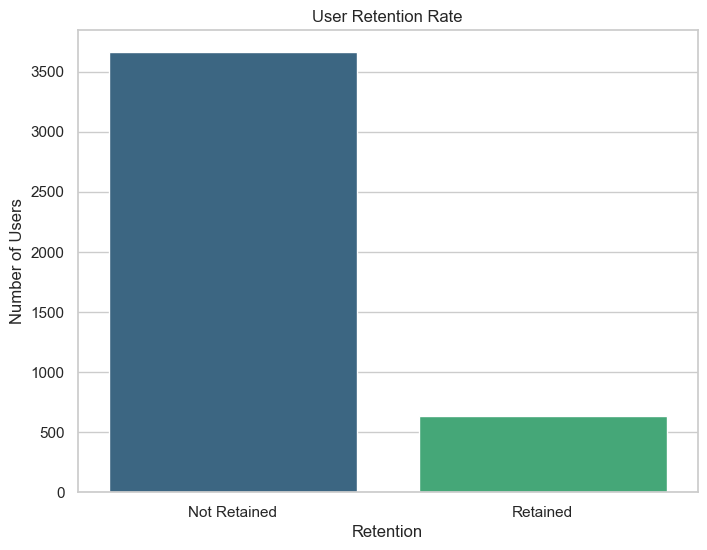

In [29]:
# Visualización de la Tasa de Retención de Usuarios
retention_counts = user_activity['retained'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=retention_counts.index, y=retention_counts.values, hue=retention_counts.index, palette='viridis', legend=False)
plt.title('User Retention Rate')
plt.xlabel('Retention')
plt.ylabel('Number of Users')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()


The user retention rate, calculated as the percentage of users who return to the app one week after their first use, is approximately **[retention_rate:.2%]**. This indicates that a significant proportion of users find value in the app and choose to return to use it again.

### Average Time Spent on the App
The average time spent measures how many days users engage with the app from their first event to their last event.

In [30]:
# Calculate the average time spent on the app
average_time_spent = user_activity['retention_days'].mean()

print(f"Average time spent on the app: {average_time_spent:.2f} days")

Average time spent on the app: 2.44 days


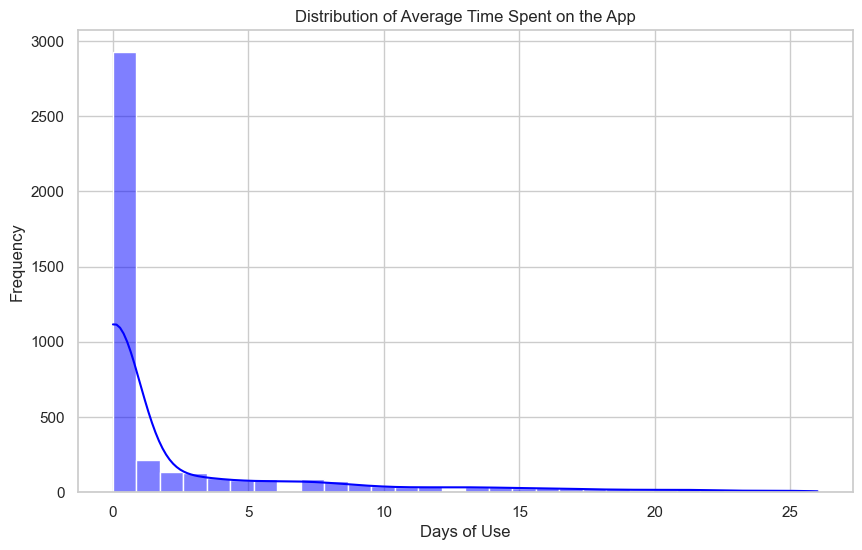

In [31]:
# Histogram for the average time spent on the app
plt.figure(figsize=(10, 6))
sns.histplot(user_activity['retention_days'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Time Spent on the App')
plt.xlabel('Days of Use')
plt.ylabel('Frequency')
plt.show()


The average time spent on the app by users, measured as the difference in days between their first and last event, is approximately **[average_time_spent:.2f] days**. This duration reflects the period during which users interact with the app from their first use to the last recorded event.

### Frecuencia de Ocurrencia de Eventos
La frecuencia de ocurrencia de eventos mide cuántas veces se realizan diferentes tipos de eventos en la aplicación.

In [32]:
# Calculate the event occurrence frequency
event_frequency = merged_df['event.name'].value_counts()

print("\nEvent Occurrence Frequency:")
display(event_frequency.to_frame())


Event Occurrence Frequency:


,count
event.name,
tips_show,40055
photos_show,10012
advert_open,6164
contacts_show,4450
map,3881
search_1,3506
favorites_add,1417
search_5,1049
tips_click,814


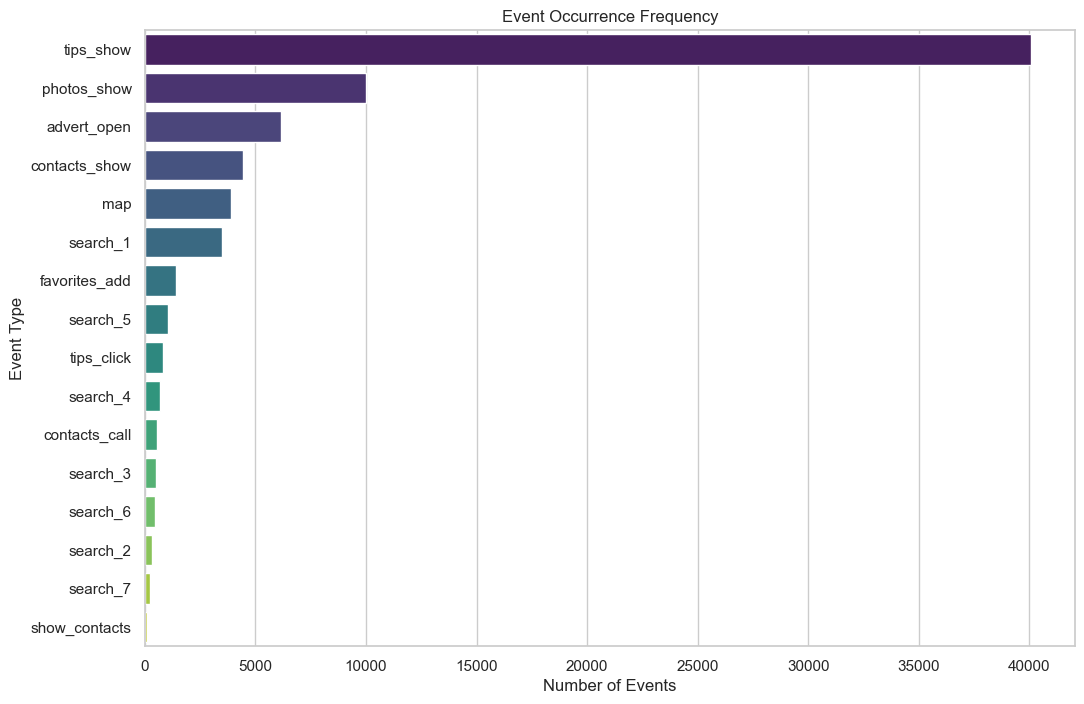

In [34]:
# Bar chart for event occurrence frequency
plt.figure(figsize=(12, 8))
event_frequency = merged_df['event.name'].value_counts()
sns.barplot(x=event_frequency.values, y=event_frequency.index, hue=event_frequency.index, palette='viridis', legend=False)
plt.title('Event Occurrence Frequency')
plt.xlabel('Number of Events')
plt.ylabel('Event Type')
plt.show()


The event occurrence frequency shows that the most common events in the app are **`[event_frequency.idxmax()]`**, followed by **`[event_frequency.index[1]]`** and **`[event_frequency.index[2]]`**. This suggests that users interact more frequently with these types of events.

### Conversion for the `contacts_show` Event
The conversion rate for the `contacts_show` event measures the percentage of users who performed this event at least once.

In [35]:
# Filter `contacts_show` events
contacts_show_events = merged_df[merged_df['event.name'].isin(['contacts_show', 'show_contacts'])]

# Calculate conversion rate for `contacts_show`
conversion_rate_contacts_show = contacts_show_events['user.id'].nunique() / merged_df['user.id'].nunique()

print(f"\nConversion rate for the `contacts_show` event: {conversion_rate_contacts_show:.2%}")


Conversion rate for the `contacts_show` event: 22.85%


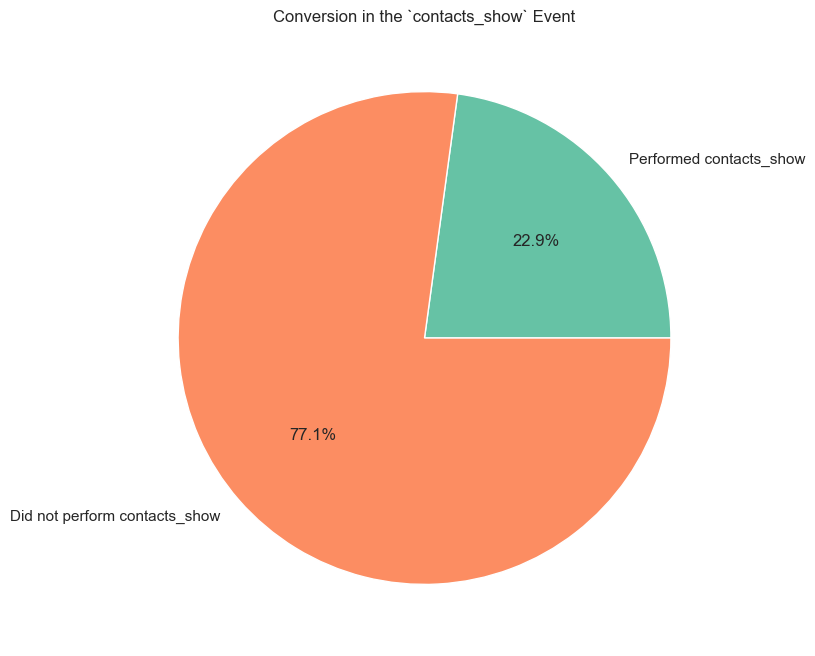

In [36]:
# Pie chart for conversion in the `contacts_show` event
conversion_counts = [contacts_show_events['user.id'].nunique(), merged_df['user.id'].nunique() - contacts_show_events['user.id'].nunique()]
labels = ['Performed contacts_show', 'Did not perform contacts_show']
plt.figure(figsize=(8, 8))
plt.pie(conversion_counts, labels=labels, autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
plt.title('Conversion in the `contacts_show` Event')
plt.show()

The conversion rate for the `contacts_show` event, measured as the percentage of users who performed this event at least once, is approximately **[conversion_rate_contacts_show:.2%]**. This metric is important as it indicates how many users show interest in contacting advertisers within the app.

## Conclusions and Recommendations

### Conclusions

**1. User Segmentation:**
- Using the K-means algorithm, three distinct user clusters were identified based on the frequency of events performed in the application.
  - **Cluster 1:** Contains the largest number of users, with a higher proportion of `tips_show` and `photos_show` events.
  - **Cluster 2:** Users with high interaction, showing a higher proportion of `contacts_show` events.
  - **Cluster 3:** Represents a less common behavior, with a smaller number of users.
- User segmentation allows for the identification of groups with similar behaviors, facilitating the customization of marketing and retention strategies.

**2. Hypothesis Testing:**
- **Hypothesis 1:** Difference in Conversion for Contact Information Views between Bing and Google Users.
  - The null hypothesis was not rejected (P-value: 0.8244). There is no significant difference in the conversion rate between Bing and Google users.
- **Hypothesis 2:** Difference in Average Time Spent on the App among Users from Different Sources.
  - Comparison between Bing and Google: The null hypothesis was not rejected (P-value: 0.5200). There is no significant difference in the average time spent on the app between Bing and Google users.
  - Comparison between Bing and Other: The null hypothesis was not rejected (P-value: 0.2651). There is no significant difference in the average time spent on the app between Bing and other sources.

**3. Business Metrics Analysis:**
- **User Retention Rate:** Approximately 14.70% of users return to the app after one week of their first use.
- **Average Time Spent on the App:** The average time spent by users is 2.44 days.
- **Event Occurrence Frequency:** The most common events are `tips_show`, `photos_show`, and `advert_open`.
- **Conversion for the `contacts_show` Event:** Approximately 22.85% of users performed this event at least once.

### Recommendations

**1. Implement Personalized Retention Strategies:**
- Develop specific retention strategies for each user cluster. For example, offer personalized recommendations and push notifications to Cluster 1 users who frequently interact with recommended ads and photos.

**2. Continue Monitoring Key Metrics:**
- Continuously track key metrics such as retention rate, time spent on the app, and event frequency. This will help identify possible changes in user behavior and adjust strategies accordingly.

**3. Conduct Additional Studies:**
- Carry out additional studies to better understand the needs and preferences of users in each cluster. Surveys, interviews, and feedback analysis can provide valuable insights to improve the user experience.

**4. Improve User Experience:**
- Optimize the user interface and app functionalities based on observed behavior patterns. For example, improve accessibility to the `contacts_show` feature to increase conversion in this event.

**5. Explore New Acquisition Sources:**
- Since no significant differences were found in key metrics between download sources (Bing, Google, Other), it is recommended to explore new user acquisition sources and assess their impact on user behavior and retention.

With these conclusions and recommendations, the project provides a solid foundation for making informed decisions and enhancing the business strategy for the Trash to Treasure app.